# Bagian 1, Pengenalan *Missing value*

![alt text](https://miro.medium.com/max/1869/0*1-i9w0e4kklVQl5B.jpg)

Seringkali pada saat terjun ke lapangan, data yang kita dapat tidak datang dalam keadaan rapi dan bersih, bahkan seringkali data yang kita peroleh sangat berantakan, diperlukan usaha ekstra untuk mempersiapkan data tersebut untuk siap dilakukan analisis

Salah satu proses dalam ‘membersihkan data’ itu adalah mengidentifikasi dan menghandle *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang


# Penyebab Missing Value
Data yang hilang ini bisa disebabkan oleh beberapa hal, salah satu contohnya adalah

*   Error pada *data entry*, baik itu *human error* ataupun kesalahan pada sistem
*   Pada data survey, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif





# Bagaimana cara mendeteksi *Missing Value*?
Biasanya untuk menandakan bahwa suatu data hilang, cell tersebut dibiarkan kosong

Nah, permasalahan yang dihadapi pada data di lapangan adalah, penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999)

Sebagai ilustrasi, perhatikan [dataset real estate](https://github.com/dataoptimal/posts/blob/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv) berikut ini

Berikut tampilan pada Microsoft Excel
![alt text](https://drive.google.com/uc?id=1_oO5xsQLsg6gerXblP2k8EDzu7aHaRh-)
Perhatikan bahwa data ini memiliki berbagai macam cara untuk mengatakan bahwa data pada *cell* tertentu adalah *missing*, misalnya:

*   *cell*nya dikosongkan
*   ditulis dengan n/a, NA, na, ataupun NaN


*   ditulis dengan symbol –
*   ataupun mempunyai nilai yang cukup aneh seperti nilai 12 pada kolom OWN_OCCUPIED, ataupun HURLEY pada kolom NUM_BATH

Ketika kita meng-load data ini ke python menggunakan pandas, beberapa notasi *missing* yang umum [otomatis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dikategorikan sebagai NaN (notasi *missing value* pada python)

![alt text](https://drive.google.com/uc?id=1_NnUMR94MfkZQJnLCJBFen9tu_dh7arS)

In [0]:
# Module yang akan digunakan

import pandas as pd
import numpy as np
# Hilangkan tanda # dibawah jika impyute belum terinstall
!pip install impyute
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
house_url = 'https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv'
house = pd.read_csv(house_url)
house

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Ternyata, masih ada beberapa nilai yang memang ‘tidak dianggap’ sebagai *missing value*, yaitu ‘–‘ pada SQ_FT dan 12 pada kolom OWN_OCCUPIED nilai-nilai tersebut harus kita kategorikan sebagai *missing value*. Pada potongan kode berikut ini, nilai na, --, HURLEY dan 12 akan digantikan dengan nilai NaN ( np.nan pada python )

In [0]:
house['SQ_FT'].replace('--',np.nan,inplace=True)
house['NUM_BEDROOMS'].replace('na',np.nan,inplace=True)
house['NUM_BATH'].replace('HURLEY',np.nan,inplace=True)
def f(x):
  try:
    int(x)
    return np.nan
  except:
    return x
house['OWN_OCCUPIED'] = house['OWN_OCCUPIED'].apply(lambda x: f(x))
house

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800


Terkadang, diperlukan *domain knowledge* untuk mendeteksi apakah suatu nilai dinotasikan sebagai *missing value*, sebagai contoh, pada [data diabetes](https://raw.githubusercontent.com/DevSurya/Pima-Diabetes-Prediction/master/data/pima-data.csv) berikut ini

In [0]:
diabetes_url = 'https://raw.githubusercontent.com/DevSurya/Pima-Diabetes-Prediction/master/data/pima-data.csv'
diabetes = pd.read_csv(diabetes_url)
diabetes

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


Salah satu cara untuk mendeteksi apakah suatu nilai dinotasikan sebagai *missing value*, kita dapat melihat nilai minimum dan maksimum dari suatu variabel, contohnya

In [0]:
diabetes.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


Perhatikan bahwa pada variabel
*   glucose_conc
*   diastolic_bp
*   thickness
*   insulin
*   bmi

tidaklah mungkin bernilai 0, maka pastilah nilai nilai ini (nilai 0 pada variabel tersebut) merupakan notasi untuk menandakan bahwa tidak ada catatan mengenai variabel tersebut pada suatu pasien (*missing value*)

In [0]:
# Mengganti nilai 0 pada variabel diatas dengan nilai NaN
diabetes[['glucose_conc','diastolic_bp','thickness','insulin','bmi']] = diabetes[['glucose_conc','diastolic_bp','thickness','insulin','bmi']].replace(0,np.nan)

# Tipe Missing Value

### Missing completely at random (MCAR)

Data hilang secara acak, dan tidak berkaitan dengan variabel tertentu <br><br>

### Missing at random (MAR)

Data di suatu variabel hilang hanya berkaitan dengan variabel respon/pengamatan. Sebagai contoh, orang yang memiliki rasa was-was tinggi (x) cenderung tidak melaporkan pendapatan (y) mereka, walaupun missing value bergantung pada berapa nilai x, tapi seberapa besar nilai y yang missing tersebut masih tetap acak <br><br>

### Missing not at random (MNAR)

Data di suatu variabel y berkaitan dengan variabel itu sendiri, tidak terdistribusi secara acak. Sebagai contoh, orang yang pendapatannya rendah cenderung tidak melaporkan pendapatannya. Tipe *missing value* ini yang relatif paling sulit untuk di handle

---
<br>
Pada MCAR dan MAR, kita boleh menghilangkan data dengan *missing value* ataupun mengimputasinya. Namun pada kasus MNAR, menghilangkan data dengan *missing value* akan menghasilkan bias pada data. mengimputasinya pun tidak selalu memberikan hasil yang baik


# Bagian 2, Menangani *Missing Value*

Setelah kita mengenali apa itu *missing value*, bagaimana biasanya *missing value* itu ditulis, dan juga apa saja tipe *missing value*. Sekarang akan dijelaskan bagaimana cara menghandle *missing value*
![alt text](https://miro.medium.com/max/1909/1*_RA3mCS30Pr0vUxbp25Yxw.png)
<sub>sumber gambar : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4 </sub>

Perlu dicatat bahwa, **tidak ada metode yang benar benar terbaik dalam menghandle missing value**, metode yang dapat digunakan akan bergantung pada tipe data dan masalah yang ditelaah

Garis besarnya, kita dapat:


## Menghindari data dengan *missing value*
yaitu drop data / menghapus data yang mengandung *missing value* ataupun menghapus variabel yang memiliki banyak sekali *missing value*

Cara menghapus data inipun ada beberapa macam

1.   *Listwise Deletion*, yaitu menghapus *row* yang mempunyai satu atau lebih *missing*
![alt text](https://drive.google.com/uc?id=1lpsnTv9zocsrGWqG8W_mKkvbrFwGQzx_)
2.   *Pairwise Deletion*, yaitu hanya menghapus *missing value* pada variabel variabel yang ingin digunakan, misal kita ingin mencari korelasi antara glucose_conc dan diastolic_bp, kita hanya perlu menghapus *row* berikut ini
![alt text](https://drive.google.com/uc?id=123PkQUldfvCtDGx9ZhQrxXiLKSGjcXtA)
3.   Menghapus variabel, yaitu membuang variabel jika data pada kolom tersebut banyak sekali yang *missing*, misalkan hampir 50%.


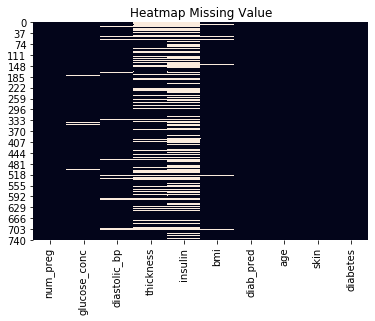

In [0]:
sns.heatmap(diabetes.isnull(),cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [0]:
(diabetes.isnull().sum()/len(diabetes)).to_frame('persentase missing')

,persentase missing
num_preg,0.000000
glucose_conc,0.006510
diastolic_bp,0.045573
thickness,0.295573
insulin,0.486979
bmi,0.014323
diab_pred,0.000000
age,0.000000
skin,0.000000
diabetes,0.000000


Variabel insulin dapat dipertimbangkan untuk dihapus

## Mengabaikan missing value
Beberapa algoritma machine learning atau metode analisis lainnya dapat dengan sendirinya menghandle missing value, contohnya adalah decision tree, k-Nearest Neighbors (kNN), Gradient Boosting Method (GBM) yang dapat mengabaikan missing value, ataupun XGBoost yang dapat mengimputasi sendiri missing value pada data

Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penerbangan, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut.

## Mengimputasinya
Kita dapat menggantikan missing value tersebut dengan suatu nilai, ada beberapa metode dalam mengimputasi missing value

## •	Univariate Imputation
###	Imputasi dengan median / mean / modus
Imputasi dengan median / mean digunakan pada data numerik, idenya kita mengganti missing value pada kolom dengan median / mean dari data yang tidak missing, sedangkan imputasi dengan modus digunakan pada data kategorik.


In [0]:
print('mean dari thickness:',diabetes['thickness'].mean())
print('median dari thickness:',diabetes['thickness'].median())
diabetes['thickness_imputed_mean'] = diabetes['thickness'].replace(np.nan, diabetes['thickness'].mean())
diabetes['thickness_imputed_median'] = diabetes['thickness'].replace(np.nan, diabetes['thickness'].median())
diabetes[['thickness','thickness_imputed_mean','thickness_imputed_median']].head(10)

mean dari thickness: 29.153419593345657
median dari thickness: 29.0


,thickness,thickness_imputed_mean,thickness_imputed_median
0,35.0,35.00000,35.0
1,29.0,29.00000,29.0
2,NaN,29.15342,29.0
3,23.0,23.00000,23.0
4,35.0,35.00000,35.0
5,NaN,29.15342,29.0
6,32.0,32.00000,32.0
7,NaN,29.15342,29.0
8,45.0,45.00000,45.0
9,NaN,29.15342,29.0


(catatan : Jika distribusi data cukup skewed (menceng kanan atau kiri), atau terdapat nilai nilai ekstrim, median lebih di sarankan daripada mean)

Alternatifnya, kita pun dapat membedakan imputasi berdasarkan variabel kategorik tertentu, misalnya untuk yang penderita diabetes, akan diimputasi dengan rata rata dari penderita diabetes, dan sebaliknya

In [0]:
mean_thickness_diabetes = diabetes[diabetes['diabetes']==True]['thickness'].mean()
mean_thickness_normal = diabetes[diabetes['diabetes']==False]['thickness'].mean()
print('mean dari thickness pada penderita diabetes:',mean_thickness_diabetes)
print('mean dari thickness pada bukan penderita diabetes:',mean_thickness_normal)
diabetes.loc[diabetes['diabetes']==True,'imputed_thickness_mean'] = diabetes.loc[diabetes['diabetes']==True,'thickness'].replace(np.nan,mean_thickness_diabetes)
diabetes.loc[diabetes['diabetes']==False,'imputed_thickness_mean'] = diabetes.loc[diabetes['diabetes']==False,'thickness'].replace(np.nan,mean_thickness_normal)
diabetes[['thickness','imputed_thickness_mean','diabetes']].head(10)

mean dari thickness pada penderita diabetes: 33.0
mean dari thickness pada bukan penderita diabetes: 27.235457063711912


,thickness,imputed_thickness_mean,diabetes
0,35.0,35.000000,True
1,29.0,29.000000,False
2,NaN,33.000000,True
3,23.0,23.000000,False
4,35.0,35.000000,True
5,NaN,27.235457,False
6,32.0,32.000000,True
7,NaN,27.235457,False
8,45.0,45.000000,True
9,NaN,33.000000,True


## •	Multivariate Imputation
###Single Imputation
Metode metode yang dapat digunakan adalah memprediksi nilai *missing* dengan menggunakan metode metode *supervised learning* seperti kNN, regresi linear, regresi logistik (untuk data kategorik)

In [0]:
sys.setrecursionlimit(100000) #Menaikkan batas rekursif dari sistem
train = diabetes.drop(['diabetes'],axis=1)
columns = train.columns

#Imputasi dengan kNN
imputed_training = fast_knn(train.values, k=30)
diabetes_knn = pd.concat([pd.DataFrame(imputed_training,columns=columns),diabetes[['diabetes']]],axis=1)
diabetes_knn.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,thickness_imputed_mean,thickness_imputed_median,imputed_thickness_mean,diabetes
0,6.0,148.0,72.000000,35.000000,155.670477,33.600000,0.627,50.0,1.3790,35.00000,35.0,35.000000,True
1,1.0,85.0,66.000000,29.000000,155.548223,26.600000,0.351,31.0,1.1426,29.00000,29.0,29.000000,False
2,8.0,183.0,64.000000,30.400452,155.377275,23.300000,0.672,32.0,0.0000,29.15342,29.0,33.000000,True
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.9062,23.00000,23.0,23.000000,False
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.3790,35.00000,35.0,35.000000,True
5,5.0,116.0,74.000000,28.933689,155.548223,25.600000,0.201,30.0,0.0000,29.15342,29.0,27.235457,False
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.2608,32.00000,32.0,32.000000,True
7,10.0,115.0,71.622463,28.994131,155.548223,35.300000,0.134,29.0,0.0000,29.15342,29.0,27.235457,False
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.7730,45.00000,45.0,45.000000,True
9,8.0,125.0,96.000000,29.303045,154.652746,32.361698,0.232,54.0,0.0000,29.15342,29.0,33.000000,True


### Multiple Imputation
Salah satu metode yang dapat digunakan adalah Multivariate Imputation by Chained Equation (MICE) untuk missing value yang numerik
![alt text](https://miro.medium.com/max/2069/1*Cw4F1pzPug0BT5XNdF_P3Q.png)
Source: http://www.stefvanbuuren.nl/publications/mice%20in%20r%20-%20draft.pdf



In [0]:
# Imputasi dengan MICE
imputed_training = mice(train.values)
diabetes_mice = pd.concat([pd.DataFrame(imputed_training,columns=columns),diabetes[['diabetes']]],axis=1)
diabetes_mice.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,thickness_imputed_mean,thickness_imputed_median,imputed_thickness_mean,diabetes
0,6.0,148.0,72.000000,35.000000,222.885510,33.600000,0.627,50.0,1.3790,35.00000,35.0,35.000000,True
1,1.0,85.0,66.000000,29.000000,69.755761,26.600000,0.351,31.0,1.1426,29.00000,29.0,29.000000,False
2,8.0,183.0,64.000000,30.368759,258.074850,23.300000,0.672,32.0,0.0000,29.15342,29.0,33.000000,True
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.9062,23.00000,23.0,23.000000,False
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.3790,35.00000,35.0,35.000000,True
5,5.0,116.0,74.000000,28.448238,115.896317,25.600000,0.201,30.0,0.0000,29.15342,29.0,27.235457,False
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.2608,32.00000,32.0,32.000000,True
7,10.0,115.0,75.711825,28.448238,118.157510,35.300000,0.134,29.0,0.0000,29.15342,29.0,27.235457,False
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.7730,45.00000,45.0,45.000000,True
9,8.0,125.0,96.000000,30.368759,158.186924,35.205511,0.232,54.0,0.0000,29.15342,29.0,33.000000,True


# Kasus Lainnya


Salah satu cara menangani *missing value* pada data kategorik dapat dijadikan level tersendiri

*missing value* pada data *Time Series*, imputasi dapat dilakukan dengan:


*   mengisi nilai yang missing dengan nilai sebelumnya yang tidak missing, sering disebut juga dengan Last Observation Carried Forward (LOCF) ataupun dengan nilai selanjutnya yang tidak missing, sering disebut juga Next Observation Carried Backward (NOCB)

*   Menggunakan Interpolasi Linear
*   Menggunakan Interpolasi Linear dengan memperhitungkan tren seasonal


# Penutup

Perlu diingat bahwa ada algoritma yang dapat walaupun ada *missing value* (misal kNN, *decision tree*, dsb), dan ada juga algoritma yang tidak akan bekerja jika ada *missing value* (misal regresi linear). Oleh karena itu, diperlukan *preprocessing* yang berbeda dalam analisis data, tergantung bagaimana kita akan menganalisis data tersebut

Akhir kata, tidak ada cara yang benar benar terbaik dalam menangani missing value, suatu metode dapat mempunyai hasil yang baik di suatu dataset, tapi bisa saja mempunyai hasil yang buruk di dataset lainnya, tidak ada jalan yang pasti, lakukanlah ekplorasi dan pahami data anda
Selamat bereksperimen, dan sampai jumpa di postingan berikutnya!

# --- End of Module ---